In [1]:
!pip install imutils

  Preparing metadata (setup.py) ... - done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=7e54c63c67254c8231b0f941c6cad9c2ea239250adbb1218e56c1e9df1b6f398
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import cv2
import imutils 
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

In [3]:
def crop_brain_contour(image, plot=False):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)
    
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]
    
    if plot:
        plt.figure()
        
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,
                       labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
        
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)
        
        plt.tick_params(axis='both', which='both',
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Cropped Image')
        
        plt.show()
        
    return new_image

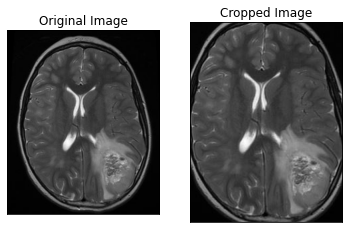

In [4]:
ex_image = cv2.imread('../input/brain-mri-images-for-brain-tumor-detection/yes/Y100.JPG')
ex_new_image = crop_brain_contour(ex_image, True)

In [5]:
def load_data(dir_list, image_size):
    
    X = []
    y = []
    
    image_width, image_height = image_size
    
    for directory in dir_list:
        for filename in listdir(directory):
            
            image = cv2.imread(directory + '/' + filename)
            
            image = crop_brain_contour(image, plot=False)
            
            image = cv2.resize(image, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
            
            image = image / 255
            
            X.append(image)
            
            if directory[-3:] == 'yes':
                y.append([1])
            else:
                y.append([0])
                
        X = np.array(X)
        y = np.array(y)
        
        X, y = shuffle(X, y)
        
        print(f'Number of examples is: {len(X)}')
        print(f'X shape is: {X.shape}')
        print(f'y shape is: {y.shape}')
        
        return X, y

In [6]:
path = '../input/brain-mri-images-for-brain-tumor-detection/'

path_yes = path + 'yes'
path_no = path + 'no'

IMG_WIDTH, IMG_HEIGHT = (240, 240)

X, y = load_data([path_yes, path_no], (IMG_WIDTH, IMG_HEIGHT))

Number of examples is: 155
X shape is: (155, 240, 240, 3)
y shape is: (155, 1)
